# Principal Components Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from plotting.plot_decision_regions import plot_decision_regions
from initialization.initialize_wine import *

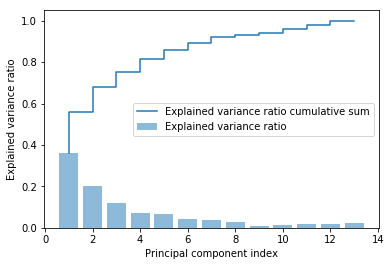

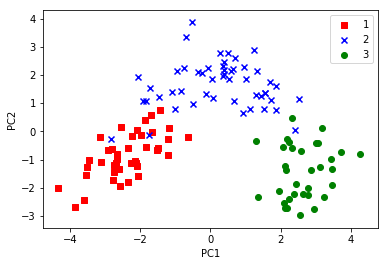

In [14]:
cov_mat = np.cov(X_train_std, rowvar=False)
eigenvals, eigenvecs = np.linalg.eig(cov_mat)
var_exp = [x / sum(eigenvals) for x in eigenvals]
cumsum = np.cumsum(var_exp)

plt.figure(1)
plt.bar(range(1,14), var_exp, label='Explained variance ratio', alpha=0.5, align='center')
plt.step(range(1,14), cumsum, label='Explained variance ratio cumulative sum')
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.legend()

eigenpairs = sorted([(np.abs(eigenvals[i]), eigenvecs[:, i]) for i in range(len(eigenvals))], 
                    key=lambda k: k[0], reverse=True)
w = np.hstack((eigenpairs[0][1][:, np.newaxis], eigenpairs[1][1][:, np.newaxis]))
X_train_pca = X_train_std @ w

plt.figure(2)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], marker=m, c=c, label=l)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper right')

plt.show()

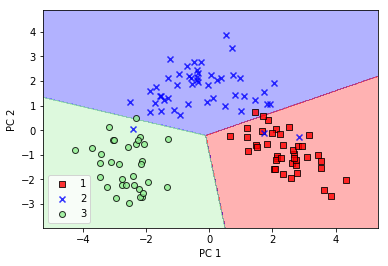

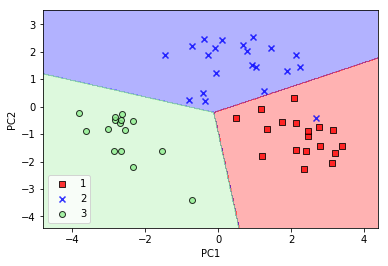

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')

plt.show()

plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')

plt.show()